In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import pynapple as nap

from pathlib import PosixPath

from spatial_manifolds.data.binning import get_bin_config
from spatial_manifolds.data.loading import load_session

import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


In [2]:
mouse = 0
day = 0
sorter = 'kilosort4'
storage = Path('/Users/harryclark/Downloads/COHORT12_nwb/')

alpha = 0.001
n_jobs = 8
n_shuffles = 100
seed = 1
class Args:
    def __init__(self,mouse,day,session_type,sorter,storage,alpha,n_jobs,n_shuffles,seed):
        self.mouse = mouse
        self.day = day
        self.session_type = session_type
        self.sorter = sorter
        self.storage = storage
        self.alpha = alpha
        self.n_jobs = n_jobs
        self.n_shuffles = n_shuffles
        self.seed = seed
args_of1 = Args(mouse,day,'OF1',sorter,storage,alpha,n_jobs,n_shuffles,seed)
args_vr = Args(mouse,day,'VR',sorter,storage,alpha,n_jobs,n_shuffles,seed)

In [3]:
# Load session
sessions = {}
for of1_session_path in sorted(list(args_of1.storage.glob(f'*/*/OF1/*OF1_beh.nwb'))): 
    vr_session_path = PosixPath(str(of1_session_path).replace("OF1", "VR"))
    print(of1_session_path)
    print(vr_session_path)

    args_of1.mouse = int(of1_session_path.parent.parent.parent.name[1:])
    args_of1.day = int(of1_session_path.parent.parent.name[1:])
    mouse_day = f'M{args_of1.mouse}D{args_of1.day}'
    sessions[mouse_day] = (
        *load_session(args_of1),
        pd.read_parquet(
            of1_session_path.parent / 'tuning_scores' / 'spatial_information.parquet'
        ),
        pd.read_parquet(
            vr_session_path.parent / 'tuning_scores' / 'spatial_information.parquet'
        ),
        pd.read_parquet(
            of1_session_path.parent / 'tuning_scores' / 'spatial_stability.parquet'
        ),
        pd.read_parquet(
            vr_session_path.parent / 'tuning_scores' / 'spatial_stability.parquet'
        ),
        pd.read_parquet(
            of1_session_path.parent / 'tuning_scores' / 'shifted_speed_correlation.parquet'
        ),
        pd.read_parquet(
            vr_session_path.parent / 'tuning_scores' / 'shifted_speed_correlation.parquet'
        )
    )


/Users/harryclark/Downloads/COHORT12_nwb/M20/D14/OF1/sub-20_day-14_ses-OF1_beh.nwb
/Users/harryclark/Downloads/COHORT12_nwb/M20/D14/VR/sub-20_day-14_ses-VR_beh.nwb
/Users/harryclark/Downloads/COHORT12_nwb/M20/D15/OF1/sub-20_day-15_ses-OF1_beh.nwb
/Users/harryclark/Downloads/COHORT12_nwb/M20/D15/VR/sub-20_day-15_ses-VR_beh.nwb
/Users/harryclark/Downloads/COHORT12_nwb/M20/D16/OF1/sub-20_day-16_ses-OF1_beh.nwb
/Users/harryclark/Downloads/COHORT12_nwb/M20/D16/VR/sub-20_day-16_ses-VR_beh.nwb
/Users/harryclark/Downloads/COHORT12_nwb/M20/D17/OF1/sub-20_day-17_ses-OF1_beh.nwb
/Users/harryclark/Downloads/COHORT12_nwb/M20/D17/VR/sub-20_day-17_ses-VR_beh.nwb
/Users/harryclark/Downloads/COHORT12_nwb/M20/D18/OF1/sub-20_day-18_ses-OF1_beh.nwb
/Users/harryclark/Downloads/COHORT12_nwb/M20/D18/VR/sub-20_day-18_ses-VR_beh.nwb
/Users/harryclark/Downloads/COHORT12_nwb/M20/D19/OF1/sub-20_day-19_ses-OF1_beh.nwb
/Users/harryclark/Downloads/COHORT12_nwb/M20/D19/VR/sub-20_day-19_ses-VR_beh.nwb
/Users/harryclar

In [16]:
len(sessions[mouse_day])

7

In [4]:
of1_spatial_stability_df  = pd.DataFrame()
vr_spatial_stability_df  = pd.DataFrame()
of1_spatial_information_df  = pd.DataFrame()
vr_spatial_information_df  = pd.DataFrame()
of1_speed_correlation_df = pd.DataFrame()
vr_speed_correlation_df = pd.DataFrame()

for mouse_day, (_ ,_, _, of1_si, vr_si, of1_ss, vr_ss, of1_sc, vr_sc) in sessions.items():
    of1_spatial_stability_df = pd.concat([of1_spatial_stability_df, of1_ss], ignore_index=True)
    of1_spatial_information_df = pd.concat([of1_spatial_information_df, of1_si], ignore_index=True)
    vr_spatial_stability_df = pd.concat([vr_spatial_stability_df, vr_ss], ignore_index=True)
    vr_spatial_information_df = pd.concat([vr_spatial_information_df, vr_si], ignore_index=True)
    of1_speed_correlation_df = pd.concat([of1_speed_correlation_df, of1_sc], ignore_index=True)
    vr_speed_correlation_df = pd.concat([vr_speed_correlation_df, vr_sc], ignore_index=True)
vr_spatial_stability_df = vr_spatial_stability_df[vr_spatial_stability_df.trials == 'nb']



,cluster_id,null_speed_correlation,speed_correlation,sig,travel
0,34,"[0.017451423444980237, -0.05230149929320038, 0...",-0.185728,True,0.0
100,37,"[-0.02403675715638642, -0.011703674444156245, ...",-0.004903,False,0.0
200,57,"[-0.012976544975928999, -0.0013631595577482732...",-0.038190,False,0.0
300,80,"[0.07445268780709476, -0.01714494821437459, 0....",-0.169051,True,0.0
400,85,"[-0.0107133511819621, -0.030714391674862698, 0...",-0.194429,True,0.0
...,...,...,...,...,...
1385600,550,"[-0.08919232648767053, -0.031699520732378306, ...",0.073536,False,0.0
1385700,552,"[0.04063293092480803, 0.0852573052890509, 0.00...",-0.032053,False,0.0
1385800,553,"[0.028784801992608283, 0.021040283580786356, -...",0.130653,True,0.0
1385900,554,"[0.011381326038542812, 0.004461365293774956, 0...",0.122530,True,0.0


In [43]:
vr_spatial_stability_df

,cluster_id,null_stability,trials,context,stability,sig
0,34,"[0.11169483894571196, -0.10902924688414363, 0....",nb,rz1,0.546177,True
1,34,"[0.04106158091456794, 0.06538122573215115, -0....",b,rz1,0.487877,True
2,34,"[0.06479783769277758, 0.14133511120855866, 0.0...",nb+b,rz1,0.658883,True
3,37,"[-0.0324046540954516, -0.07422715898343586, 0....",nb,rz1,0.006286,False
4,37,"[0.00891008729738072, -0.028724831537325846, 0...",b,rz1,0.628009,True
...,...,...,...,...,...,...
41174,554,"[0.04756696498703047, 0.11201785114907475, -0....",b,rz1,0.569365,True
41175,554,"[-0.04874834931477038, 0.17012972904820398, 0....",nb+b,rz1,0.615301,True
41176,556,"[-0.08303766893839931, -0.05528737467109037, 0...",nb,rz1,0.420807,True
41177,556,"[0.0757585130324783, 0.15765548267325993, 0.11...",b,rz1,0.966360,True


In [39]:
of1_spatial_information_df

,cluster_id,null_spatial_information,spatial_information,sig
0,34,"[0.39815132806625236, 0.31591195887287193, 0.2...",0.534997,True
1,37,"[0.43269300118874016, 0.29772220146841727, 0.3...",0.512524,False
2,57,"[0.30032138253627394, 0.2446458903183736, 0.22...",0.604965,True
3,80,"[0.05388439938846458, 0.039457679300838905, 0....",0.047374,False
4,85,"[0.06454396114479401, 0.05951677126197709, 0.0...",0.064021,False
...,...,...,...,...
13856,550,"[0.06045657703125687, 0.058982158517194946, 0....",0.047240,False
13857,552,"[0.02908086189600354, 0.022667693684112873, 0....",0.025299,False
13858,553,"[0.018138770878658516, 0.018748027075030104, 0...",0.019606,False
13859,554,"[0.05014209687359427, 0.06686798933411739, 0.0...",0.069066,False


In [33]:
of1_spatial_stability_df

,cluster_id,null_stability,stability,sig
0,34,"[-0.038377891444340874, -0.027224109317948487,...",0.181355,True
1,37,"[-0.02639365098961104, 0.03608102742351859, -0...",0.015891,False
2,57,"[0.0241488504120048, 0.050206921471003786, -0....",0.137782,True
3,80,"[-0.016195781635304028, -0.006093453878530441,...",0.052959,False
4,85,"[0.0081510188066862, -0.016489881195553755, -0...",0.097864,False
...,...,...,...,...
13856,550,"[-0.002809849027590567, -0.016864693697326516,...",0.031108,False
13857,552,"[0.01936929225198448, -0.006268820697853287, -...",0.069094,False
13858,553,"[0.010494766151492562, -0.0004402054070287477,...",-0.007422,False
13859,554,"[-0.07972180470117995, -0.05667073527417723, -...",0.020659,False


In [34]:
vr_spatial_information_df

,cluster_id,null_spatial_information,spatial_information,sig
0,34,"[0.017930837493085966, 0.012323744474584482, 0...",0.275796,True
1,37,"[0.02598184561588731, 0.012472095851860569, 0....",0.137046,True
2,57,"[0.007026698748673414, 0.013521721638587053, 0...",0.358422,True
3,80,"[0.002049147581859958, 0.004343450020425292, 0...",0.012246,True
4,85,"[0.0016426968030663984, 0.0023435864904292935,...",0.031465,True
...,...,...,...,...
13856,550,"[0.004852155186959861, 0.00938049319652622, 0....",0.067439,True
13857,552,"[0.002366263058497939, 0.0008158724681127762, ...",0.032008,True
13858,553,"[0.002517542954459431, 0.0017853024983330097, ...",0.035685,True
13859,554,"[0.0017523523506003042, 0.0011557971110396556,...",0.020989,True


In [37]:
vr_spatial_stability_df

,cluster_id,null_stability,trials,context,stability,sig
2,34,"[0.06479783769277758, 0.14133511120855866, 0.0...",nb+b,rz1,0.658883,True
5,37,"[-0.1839501646721086, -0.12740885225082454, -0...",nb+b,rz1,0.464107,True
8,57,"[0.13771859143849974, 0.2734547114054912, 0.08...",nb+b,rz1,0.515893,True
11,80,"[-0.07694213169579261, 0.006819269952070796, -...",nb+b,rz1,0.322756,True
14,85,"[-0.08468831744771867, 0.11451693447360585, -0...",nb+b,rz1,0.383459,True
...,...,...,...,...,...,...
41166,550,"[-0.011811984921025358, -0.025078790227852216,...",nb+b,rz1,0.749784,True
41169,552,"[0.08843478250320647, -0.005890840214415165, -...",nb+b,rz1,0.713308,True
41172,553,"[-0.021580057331932894, 0.23342037235163957, 0...",nb+b,rz1,0.718568,True
41175,554,"[-0.04874834931477038, 0.17012972904820398, 0....",nb+b,rz1,0.615301,True


In [58]:
of1_spatial_information_df

,cluster_id,null_spatial_information,spatial_information,sig
0,34,"[0.39815132806625236, 0.31591195887287193, 0.2...",0.534997,True
1,37,"[0.43269300118874016, 0.29772220146841727, 0.3...",0.512524,False
2,57,"[0.30032138253627394, 0.2446458903183736, 0.22...",0.604965,True
3,80,"[0.05388439938846458, 0.039457679300838905, 0....",0.047374,False
4,85,"[0.06454396114479401, 0.05951677126197709, 0.0...",0.064021,False
...,...,...,...,...
13856,550,"[0.06045657703125687, 0.058982158517194946, 0....",0.047240,False
13857,552,"[0.02908086189600354, 0.022667693684112873, 0....",0.025299,False
13858,553,"[0.018138770878658516, 0.018748027075030104, 0...",0.019606,False
13859,554,"[0.05014209687359427, 0.06686798933411739, 0.0...",0.069066,False


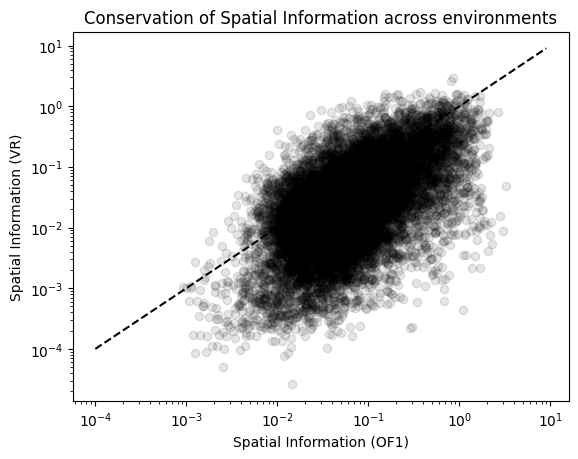

In [72]:

# Extract spatial information values
values1 = of1_spatial_information_df['spatial_information']
values2 = vr_spatial_information_df['spatial_information']

# Create scatter plot with logarithmic axes
plt.plot(np.arange(0.0001, 10), np.arange(0.0001, 10), color='black', linestyle='dashed')
plt.scatter(values1, values2, color='black', alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Spatial Information (OF1)')
plt.ylabel('Spatial Information (VR)')
plt.title('Conservation of Spatial Information across environments')
plt.show()


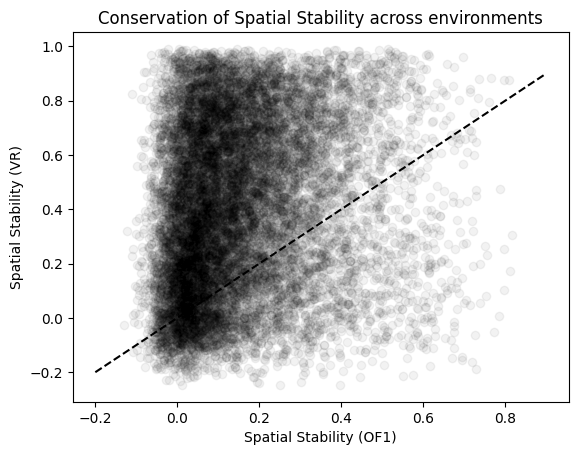

In [78]:

# Extract spatial information values
values1 = of1_spatial_stability_df['stability']
values2 = vr_spatial_stability_df['stability']

# Create scatter plot with logarithmic axes
plt.plot(np.arange(-.2, 1, 0.1), np.arange(-.2, 1, 0.1), color='black', linestyle='dashed')

plt.scatter(values1, values2, color='black', alpha=0.05)
plt.xlabel('Spatial Stability (OF1)')
plt.ylabel('Spatial Stability (VR)')
plt.title('Conservation of Spatial Stability across environments')
plt.show()


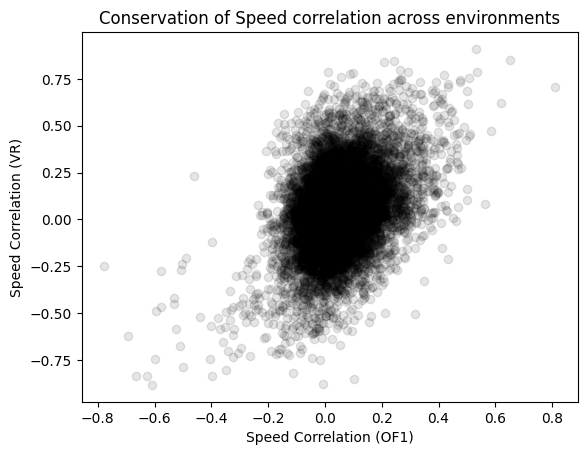

,cluster_id,null_speed_correlation,speed_correlation,sig,travel
0,34,"[0.017451423444980237, -0.05230149929320038, 0...",-0.185728,True,0.0
100,37,"[-0.02403675715638642, -0.011703674444156245, ...",-0.004903,False,0.0
200,57,"[-0.012976544975928999, -0.0013631595577482732...",-0.038190,False,0.0
300,80,"[0.07445268780709476, -0.01714494821437459, 0....",-0.169051,True,0.0
400,85,"[-0.0107133511819621, -0.030714391674862698, 0...",-0.194429,True,0.0
...,...,...,...,...,...
1385600,550,"[-0.08919232648767053, -0.031699520732378306, ...",0.073536,False,0.0
1385700,552,"[0.04063293092480803, 0.0852573052890509, 0.00...",-0.032053,False,0.0
1385800,553,"[0.028784801992608283, 0.021040283580786356, -...",0.130653,True,0.0
1385900,554,"[0.011381326038542812, 0.004461365293774956, 0...",0.122530,True,0.0


: 

In [ ]:

# Extract spatial information values
values1 = of1_speed_correlation_df.query('travel == 0')['speed_correlation']
values2 = vr_speed_correlation_df.query('travel == 0')['speed_correlation']

# Create scatter plot with logarithmic axes
plt.plot(np.arange(0.0001, 1), np.arange(0.0001, 1), color='black', linestyle='dashed')
plt.scatter(values1, values2, color='black', alpha=0.1)
plt.xlabel('Speed Correlation (OF1)')
plt.ylabel('Speed Correlation (VR)')
plt.title('Conservation of Speed correlation across environments')
plt.show()


vr_speed_correlation_df.query('travel == 0')